# IPython and Jupyter

### A brief history of interactive scientific computing in Python

Jupyter is a product of a long process of scientific programming tool development that began as an "enhanced inteactive shell" called IPython (mind the upper case "I") developed by a CU Boulder graduate student:

IPython creator Fernando Perez:

> 
I started using Python in 2001 and liked the language, but its interactive prompt felt like a crippled toy compared to the systems mentioned above or to a Unix shell.  When I found out about sys.displayhook, I realized that by putting in a callable object, I would be able to hold state and capture previous results for reuse.  I then wrote a python startup file to provide these features and some other niceties such as loading Numeric and Gnuplot, giving me a 'mini-mathematica' in Python (femto- might be a better description, in fairness).  Thus was my 'ipython-0.0.1' born, a mere 259 lines to be loaded as $PYTYHONSTARTUP.

**IPython** (Interactive Python) is an enhanced Python shell which provides a more robust and productive development environment for users. There are several key features that set it apart from the standard Python shell.

* Interactive data analysis and visualization
* Python kernel for Jupyter notebooks
* Easy parallel computation
* Flexible, embeddable interpreters to load into your own projects

## Installation

While Jupyter runs code in many programming languages, **Python is a requirement** (Python 3.3 or greater, or Python 2.7) for installing the Jupyter Notebook.

For ~~new~~ *most* users, we highly recommend installing Anaconda, which conveniently installs Python, the Jupyter Notebook, and other commonly used packages for scientific computing and data science.

We recommend using the Anaconda distribution to install Python and Jupyter, following the instructions on the download page. If it is not installed already, Jupyter notebooks can be installed via the `conda` tool:

    conda install notebook

Congratulations, you have installed Jupyter Notebook! To run the notebook:

    jupyter notebook

As an existing Python user, you may wish to install Jupyter using Python’s package manager, `pip`, instead of Anaconda.

    pip install jupyter

# Jupyter Notebook

Over time, the IPython project grew to include several components, including:

* an interactive shell
* a REPL protocol
* a notebook document fromat
* a notebook document conversion tool
* a web-based notebook authoring tool
* tools for building interactive UI (widgets)
* interactive parallel Python

As each component has evolved, several had grown to the point that they warrented projects of their own. For example, pieces like the notebook and protocol are not even specific to Python. As the result, the IPython team created Project Jupyter, which is the new home of language-agnostic projects that began as part of IPython, such as the notebook in which you are reading this text.

The HTML notebook that is part of the Jupyter project supports **interactive data visualization** and easy high-performance **parallel computing**.


## The Basics

Interface tour:

- Home page and tabs
- Starting a new kernel
- Menubar and toolbar

### `.ipynb` files

Jupyter notebook files are simple JSON documents, containing text, source code, rich media output, and metadata. each segment of the document is stored in a cell.

### Notebook cells

Notebooks can be populated with **cells** of content. They all have the same structure in the JSON notebook file:

```json
{
  "cell_type" : "name",
  "metadata" : {},
  "source" : "single string or [list, of, strings]",
}
```


There are three types of cells:

**Markdown cells** are used for body-text, and contain markdown, as defined in GitHub-flavored markdown.

**Code cells** are the primary content of Jupyter notebooks. They contain source code in the language of the document’s associated kernel, and a list of outputs associated with executing that code. 

**Raw NBConvert cells** contain content that should be included unmodified in nbconvert output. For example, this cell could include raw LaTeX for nbconvert to pdf via LaTeX. These are not rendered by the notebook.

The text you are reading now is a markdown cell. Here's a simple example calculation in a code cell:

In [55]:
import numpy as np
np.random.random(5)

array([ 0.57067361,  0.38822348,  0.84449   ,  0.08808411,  0.34326292])

## Jupyter Architecture

The Jupyter architecture consists of four components:

1. **Engine** The IPython engine is a Python instance that accepts Python commands over a network connection.  When multiple engines are started, parallel and distributed computing becomes possible. An important property of an IPython engine is that it blocks while user code is being executed. 

2. **Hub** The hub keeps track of engine connections, schedulers, clients, as well as persist all task requests and results in a database for later use.

3. **Schedulers** All actions that can be performed on the engine go through a Scheduler. While the engines themselves block when user code is run, the schedulers hide that from the user to provide a fully asynchronous interface to a set of engines.

4. **Client** The primary object for connecting to a cluster.

![IPython architecture](images/ipython_architecture.png)
(courtesy Min Ragan-Kelley)

This architecture is implemented using the ØMQ messaging library and the associated Python bindings in `pyzmq`.

The notebook lets you document your workflow using either HTML or Markdown.

The Jupyter Notebook consists of two related components:

* A JSON based Notebook document format for recording and distributing Python code and rich text.
* A web-based user interface for authoring and running notebook documents.

Starting the Notebook server with the command:

    $ ipython notebook
    
initiates an **iPython engine**, which is a Python instance that takes Python commands over a network connection.

The **IPython controller** provides an interface for working with a set of engines, to which one or more **iPython clients** can connect.

The Notebook gives you everything that a browser gives you. For example, you can embed images, videos, or entire websites.

In [16]:
from IPython.display import IFrame
IFrame('https://jupyter.org', width='100%', height=350)

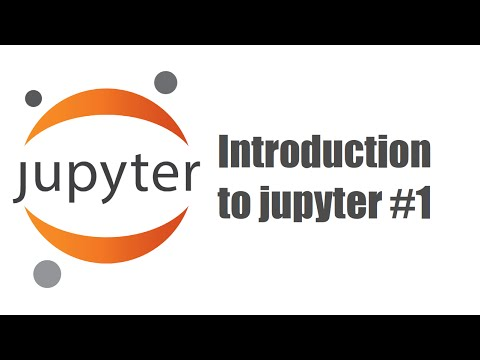

In [53]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rc4JQWowG5I")

## Code Cells

### Command history

In IPython, all your inputs and outputs are saved. There are two variables named `In` and `Out` which are assigned as you work with your results. All outputs are saved automatically to variables of the form `_N`, where `N` is the prompt number, and inputs to `_iN`. This allows you to recover quickly the result of a prior computation by referring to its number even if you forgot to store it as a variable. 

In [1]:
np.sin(4)**2

0.57275001690430671

In [2]:
_1

0.57275001690430671

In [3]:
_i1

'import numpy as np\nnp.sin(4)**2'

In [4]:
_1 / 4.

0.14318750422607668

### Introspection

If you want details regarding the properties and functionality of any Python objects currently loaded into IPython, you can use the `?` to reveal any details that are available:

In [5]:
some_dict = {}
some_dict?

If available, additional detail is provided with two question marks, including the source code of the object itself.

In [6]:
from numpy.linalg import cholesky
cholesky??

This syntax can also be used to search namespaces with wildcards (`*`).

In [7]:
np.random.rand*?

### Tab completion

Because IPython allows for introspection, it is able to afford the user the ability to tab-complete commands that have been partially typed. This is done by pressing the `<tab>` key at any point during the process of typing a command:

In [8]:
np.ar

AttributeError: module 'numpy' has no attribute 'ar'

### System commands

In IPython, you can type `ls` to see your files or `cd` to change directories, just like you would at a regular system prompt:

In [9]:
ls /Users/fonnescj/Dropbox/Notes/

AGE_methods.md
Adult Flu Vaccination Statistical Analysis Plan slides.md
Adult Flu Vaccination Statistical Analysis Plan.md
Bayesian Calibration of Probability Forecasts.md
Complex Interventions Analytic Approaches.md
Dask.md
Flu Vaccination Statistical Analysis Plan slides.md
Flu Vaccination Statistical Analysis Plan.md
Population modeling.md
Probabilistic programming notes.md
Stratagem.md
Variational Inference.md
analysis_plan.md


Virtually any system command can be accessed by prepending `!`, which passes any subsequent command directly to the OS.

In [10]:
!locate python | grep pdf

/Applications/TeX/TeXShop.app/Contents/Resources/TeXShop/Engines/Inactive/pythontex/README.pdf
/Applications/TeX/TeXShop.app/Contents/Resources/TeXShop/Engines/Inactive/pythontex/pythontex_gallery.pdf
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/backends/backend_pdf.py
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/backends/backend_pdf.pyc
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mpl-data/fonts/pdfcorefonts
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Bold.afm
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-BoldOblique.afm
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Oblique.afm
/System/Library/Frameworks/Python.framework/Versions/2.7/Extr

/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/asn1crypto/pdf.py
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/asn1crypto/pdf.pyc
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/enum/doc/enum.pdf
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.pyc
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Bold.afm
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-BoldOblique.afm
/Users/fonnescj/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Oblique.afm
/Users/fonnescj/.j

/Users/fonnescj/.vscode/extensions/donjayamanne.python-0.7.0/node_modules/transformime/lib/pdf.transform.js
/Users/fonnescj/.vscode/extensions/donjayamanne.python-0.7.0/node_modules/transformime/src/pdf.transform.js
/Users/fonnescj/.vscode/extensions/donjayamanne.python-0.7.0/node_modules/transformime/test/pdf.transform.test.js
/Users/fonnescj/.vscode/extensions/yzane.markdown-pdf-0.1.7/node_modules/highlight.js/lib/languages/python.js
/Users/fonnescj/Repos/randpython/misc/mdsr-toc.pdf
/Users/fonnescj/Repos/scientific-python-workshop/notebooks/images/360px-Exponential_pdf.svg.png
/Users/fonnescj/Repos/scientific-python-workshop/notebooks/images/Gamma_distribution_pdf.svg.png
/Users/fonnescj/Repos/statistical-analysis-python-tutorial/data/names/NationalReadMe.pdf
/Users/fonnescj/anaconda3/envs/bios8366/lib/python3.6/site-packages/asn1crypto/__pycache__/pdf.cpython-36.pyc
/Users/fonnescj/anaconda3/envs/bios8366/lib/python3.6/site-packages/asn1crypto/pdf.py
/Users/fonnescj/anaconda3/envs/

/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbconvert_support/__pycache__/pre_svg2pdf.cpython-36.pyc
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbconvert_support/pre_svg2pdf.py
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbextensions/highlighter/export_highlights.pdf
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/jupyter_contrib_nbextensions/nbextensions/highlighter/tst_highlights.pdf
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/latex_envs/static/doc/documentation.pdf
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/matplotlib/backends/__pycache__/backend_pdf.cpython-36.pyc
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts
/Users/fonnescj/anaconda3/

/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/lib/boost_1.62.0/boost/math/distributions/detail/hypergeometric_pdf.hpp
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/stan/math/prim/mat/prob/gaussian_dlm_obs_lpdf.hpp
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/stan/math/prim/mat/prob/inv_wishart_lpdf.hpp
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/stan/math/prim/mat/prob/lkj_corr_cholesky_lpdf.hpp
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/stan/math/prim/mat/prob/lkj_corr_lpdf.hpp
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/stan/math/prim/mat/prob/lkj_cov_lpdf.hpp
/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/stan/lib/stan_math_2.14.0/stan/math/prim/mat/prob/mat

/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/backends/__pycache__/backend_pdf.cpython-36.pyc
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Bold.afm
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-BoldOblique.afm
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Oblique.afm
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier.afm
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
/Users/fonnescj/anaconda3/envs/hme/lib/python3.6/site-packages/matplotlib/mp

/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/backends/__pycache__/backend_pdf.cpython-36.pyc
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Bold.afm
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-BoldOblique.afm
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Oblique.afm
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier.afm
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
/Users/fonnescj/anaconda3/envs/ngcm/lib/python3.6/site-packages/matp

/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/backends/__pycache__/backend_pdf.cpython-35.pyc
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/backends/backend_pdf.py
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Bold.afm
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-BoldOblique.afm
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier-Oblique.afm
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Courier.afm
/Users/fonnescj/anaconda3/envs/scratch/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
/Users/fonnescj/anaconda3/envs/scratch/lib/p

/Users/fonnescj/anaconda3/lib/python3.6/site-packages/matplotlib/tests/__pycache__/test_backend_pdf.cpython-36.pyc
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/matplotlib/tests/test_backend_pdf.py
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_images/test_axes_grid1/divider_append_axes.pdf
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_images/test_mplot3d/bar3d.pdf
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_images/test_mplot3d/contour3d.pdf
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_images/test_mplot3d/contourf3d.pdf
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_images/test_mplot3d/contourf3d_fill.pdf
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_images/test_mplot3d/lines3d.pdf
/Users/fonnescj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/tests/baseline_im

/Users/fonnescj/anaconda3/pkgs/rise-5.0.0-py36_0/lib/python3.6/site-packages/rise/static/reveal.js/css/print/pdf.css
/Users/fonnescj/anaconda3/pkgs/rise-5.0.0-py36_0/lib/python3.6/site-packages/rise/static/reveal.js/plugin/print-pdf
/Users/fonnescj/anaconda3/pkgs/rise-5.0.0-py36_0/lib/python3.6/site-packages/rise/static/reveal.js/plugin/print-pdf/print-pdf.js
/Users/fonnescj/anaconda3/pkgs/rise-5.0.0-py36_0/lib/python3.6/site-packages/rise/static/reveal.js/test/test-pdf.html
/Users/fonnescj/anaconda3/pkgs/rise-5.0.0-py36_0/lib/python3.6/site-packages/rise/static/reveal.js/test/test-pdf.js
/Users/fonnescj/anaconda3/pkgs/spyder-3.1.2-py36_0/lib/python3.6/site-packages/spyder/images/filetypes/pdf.png
/usr/local/texlive/2016/texmf-dist/doc/latex/pythontex/pythontex.pdf
/usr/local/texlive/2016/texmf-dist/doc/latex/pythontex/pythontex_gallery.pdf
/usr/local/texlive/2016/texmf-dist/doc/latex/pythontex/pythontex_quickstart.pdf


You can even use Python variables in commands sent to the OS:

In [11]:
file_type = 'png'
!ls images/*$file_type

images/ipython_architecture.png     images/qtconsole.png
images/parallel_tab.png             images/workflow.png
images/python-logo-master-v3-TM.png


The output of a system command using the exclamation point syntax can be assigned to a Python variable.

In [12]:
data_files = !ls images/

In [13]:
data_files

['ipython_architecture.png',
 'parallel_tab.png',
 'python-logo-master-v3-TM.png',
 'qtconsole.png',
 'workflow.png']

In [14]:
%qtconsole

## Qt Console

If you type at the system prompt:

    $ ipython qtconsole

instead of opening in a terminal, IPython will start a graphical console that at first sight appears just like a terminal, but which is in fact much more capable than a text-only terminal.  This is a specialized terminal designed for interactive scientific work, and it supports full multi-line editing with color highlighting and graphical calltips for functions, it can keep multiple IPython sessions open simultaneously in tabs, and when scripts run it can display the figures inline directly in the work area.

![qtconsole](images/qtconsole.png)

## Interactive Plotting

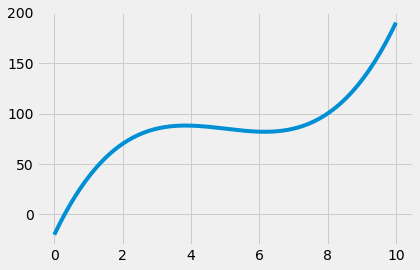

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def f(x):
    return (x-3)*(x-5)*(x-7)+85

import numpy as np
x = np.linspace(0, 10, 200)
y = f(x)
plt.plot(x,y)

### Bokeh

**Matplotlib** will be your workhorse for creating plots in notebooks. But it's not the only game in town! A recent new player is [**Bokeh**](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb), a visualization library to make amazing interactive plots and share them online. It can also handle very large data sets with excellent performance.

If you installed **Anaconda** in your system, you will probably already have **Bokeh**. You can check if it's there by running the `conda list` command. If you installed **Miniconda**, you will need to install it with `conda install bokeh`.

After installing **Bokeh**, we have many modules available: [`bokeh.plotting`](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh-plotting) gives you the ability to create interactive figures with zoom, pan, resize, save, and other tools.

In [56]:
from bokeh import plotting as bplotting

**Bokeh** integrates with Jupyter notebooks by calling the output function, as follows:

In [57]:
bplotting.output_notebook()

Loading BokehJS ...

In [59]:
# Get an array of 100 evenly spaced points from 0 to 2*pi
x = np.linspace(0.0, 2.0 * numpy.pi, 100)

# Make a pointwise function of x with exp(sin(x))
y = np.exp(np.sin(x))

deriv_exact = y * np.cos(x) # analytical derivative

In [61]:
def forward_diff(y, x):
    """Compute derivative by forward differencing."""

    # Use numpy.empty to make an empty array to put our derivatives in
    deriv = numpy.empty(y.size - 1)

    # Use a for-loop to go through each point and compute the derivative.
    for i in range(deriv.size):
        deriv[i] = (y[i+1] - y[i]) / (x[i+1] - x[i])
        
    # Return the derivative (a NumPy array)
    return deriv
        
# Call the function to perform finite differencing
deriv = forward_diff(y, x)

In [64]:
# create a new Bokeh plot with axis labels, name it "bop"
bop = bplotting.figure(x_axis_label='x', y_axis_label='dy/dx')

# add a title, change the font
bop.title.text = "Derivative of exp(sin(x))"
bop.title.text_font = "palatino"

# add a line with legend and line thickness to "bop"
bop.line(x, deriv_exact, legend="analytical", line_width=2)

# add circle markers with legend, specify color
bop.circle((x[1:] + x[:-1]) / 2.0, deriv, legend="numerical", fill_color="gray", size=8, line_color=None)

bop.grid.grid_line_alpha=0.3

bplotting.show(bop);

## Markdown cells

Markdown is a simple *markup* language that allows plain text to be converted into HTML.

The advantages of using Markdown over HTML (and LaTeX):

- its a **human-readable** format 
- allows writers to focus on content rather than formatting and layout
- easier to learn and use

For example, instead of writing:

```html
<p>In order to create valid 
<a href="http://en.wikipedia.org/wiki/HTML">HTML</a>, you 
need properly coded syntax that can be cumbersome for 
&#8220;non-programmers&#8221; to write. Sometimes, you
just want to easily make certain words <strong>bold
</strong>, and certain words <em>italicized</em> without
having to remember the syntax. Additionally, for example,
creating lists:</p>
<ul>
<li>should be easy</li>
<li>should not involve programming</li>
</ul>
```

we can write the following in Markdown:

```markdown
In order to create valid [HTML], you need properly
coded syntax that can be cumbersome for 
"non-programmers" to write. Sometimes, you just want
to easily make certain words **bold**, and certain 
words *italicized* without having to remember the 
syntax. Additionally, for example, creating lists:

* should be easy
* should not involve programming
```

### Emphasis

Markdown uses `*` (asterisk) and `_` (underscore) characters as 
indicators of emphasis. 

    *italic*, _italic_  
    **bold**, __bold__
    ***bold-italic***, ___bold-italic___

*italic*, _italic_  
**bold**, __bold__  
***bold-italic***, ___bold-italic___

### Lists

Markdown supports both unordered and ordered lists. Unordered lists can use `*`, `-`, or 
`+` to define a list. This is an unordered list:  

    * Apples
    * Bananas
    * Oranges

* Apples
* Bananas
* Oranges

Ordered lists are numbered lists in plain text:

    1. Bryan Ferry
    2. Brian Eno
    3. Andy Mackay
    4. Paul Thompson
    5. Phil Manzanera

1. Bryan Ferry
2. Brian Eno
3. Andy Mackay
4. Paul Thompson
5. Phil Manzanera

### Links

Markdown inline links are equivalent to HTML `<a href='foo.com'>` 
links, they just have a different syntax. 

    [Biostatistics home page](http://biostat.mc.vanderbilt.edu "Visit Biostat!")

[Biostatistics home page](http://biostat.mc.vanderbilt.edu "Visit Biostat!")

### Block quotes

Block quotes are denoted by a `>` (greater than) character 
before each line of the block quote.

    > Sometimes a simple model will outperform a more complex model . . . 
    > Nevertheless, I believe that deliberately limiting the complexity 
    > of the model is not fruitful when the problem is evidently complex. 

> Sometimes a simple model will outperform a more complex model . . .
> Nevertheless, I believe that deliberately limiting the complexity 
> of the model is not fruitful when the problem is evidently complex.

### Images

Images look an awful lot like Markdown links, they just have an extra 
`!` (exclamation mark) in front of them. 

    ![Python logo](images/python-logo-master-v3-TM.png)

![Python logo](images/python-logo-master-v3-TM.png)

### Remote Code

Use `%load` to add remote code

In [ ]:
# %load http://matplotlib.org/mpl_examples/shapes_and_collections/scatter_demo.py
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


### Mathjax Support

Mathjax ia a javascript implementation $\alpha$ of LaTeX that allows equations to be embedded into HTML. For example, this markup:

    """$$ \int_{a}^{b} f(x)\, dx \approx \frac{1}{2} \sum_{k=1}^{N} \left( x_{k} - x_{k-1} \right) \left( f(x_{k}) + f(x_{k-1}) \right). $$"""
    
becomes this:

$$
\int_{a}^{b} f(x)\, dx \approx \frac{1}{2} \sum_{k=1}^{N} \left( x_{k} - x_{k-1} \right) \left( f(x_{k}) + f(x_{k-1}) \right).
$$

## SymPy Support

SymPy is a Python library for symbolic mathematics. It supports:

* polynomials
* calculus
* solving equations
* discrete math
* matrices

In [19]:
from sympy import *
init_printing()
x, y = symbols("x y")

In [20]:
eq = ((x+y)**2 * (x+1))
eq

In [21]:
expand(eq)

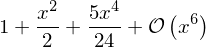

In [22]:
(1/cos(x)).series(x, 0, 6)

In [23]:
limit((sin(x)-x)/x**3, x, 0)

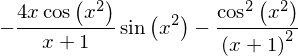

In [24]:
diff(cos(x**2)**2 / (1+x), x)

### Magic functions

IPython has a set of predefined ‘magic functions’ that you can call with a command line style syntax. These include:

* `%run`
* `%edit`
* `%debug`
* `%timeit`
* `%paste`
* `%load_ext`



In [25]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

Timing the execution of code; the `timeit` magic exists both in line and cell form:

In [26]:
%timeit np.linalg.eigvals(np.random.rand(100,100))

3.99 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit a = np.random.rand(100, 100)
np.linalg.eigvals(a)

4.1 ms ± 390 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


IPython also creates aliases for a few common interpreters, such as bash, ruby, perl, etc.

These are all equivalent to `%%script <name>`

In [28]:
%%ruby
puts "Hello from Ruby #{RUBY_VERSION}"

Hello from Ruby 2.3.3


In [29]:
%%bash
echo "hello from $BASH"

hello from /bin/bash


IPython has an `rmagic` extension that contains a some magic functions for working with R via rpy2. This extension can be loaded using the `%load_ext` magic as follows:

In [30]:
%load_ext rpy2.ipython

If the above generates an error, it is likely that you do not have the `rpy2` module installed. You can install this now via:

In [31]:
!pip install rpy2

In [32]:
x,y = np.arange(10), np.random.normal(size=10)
%R print(lm(rnorm(10)~rnorm(10)))


Call:
lm(formula = rnorm(10) ~ rnorm(10))

Coefficients:
(Intercept)  
     0.2196  




Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1323 -0.4516  0.0595  0.3864  1.0509 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.92092    0.39830   2.312   0.0495 *
x           -0.18855    0.07461  -2.527   0.0354 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6777 on 8 degrees of freedom
Multiple R-squared:  0.4439,	Adjusted R-squared:  0.3744 
F-statistic: 6.387 on 1 and 8 DF,  p-value: 0.03541



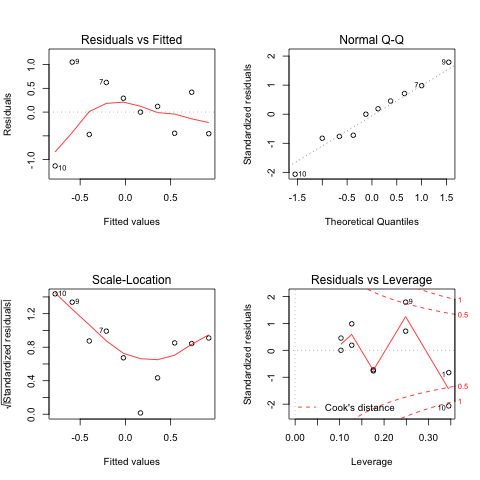

In [33]:
%%R -i x,y -o XYcoef
lm.fit <- lm(y~x)
par(mfrow=c(2,2))
print(summary(lm.fit))
plot(lm.fit)
XYcoef <- coef(lm.fit)

In [34]:
XYcoef

array([ 0.92091708, -0.18855393])

## Debugging

The `%debug` magic can be used to trigger the IPython debugger (`ipd`) for a cell that raises an exception. The debugger allows you to step through code line-by-line and inspect variables and execute code.

In [35]:
def div(x, y):
    return x/y

div(1,0)

ZeroDivisionError: division by zero

In [36]:
%debug

> <ipython-input-35-a5097cc0c0c5>(2)div()
      1 def div(x, y):
----> 2     return x/y
      3 
      4 div(1,0)

ipdb> q


## Exporting and Converting Notebooks

In Jupyter, one can convert an `.ipynb` notebook document file into various static formats via the `nbconvert` tool. Currently, nbconvert is a command line tool, run as a script using Jupyter.

In [37]:
!jupyter nbconvert --to html "IPython and Jupyter.ipynb"

[NbConvertApp] Converting notebook IPython and Jupyter.ipynb to html
[NbConvertApp] Writing 476175 bytes to IPython and Jupyter.html


Currently, `nbconvert` supports HTML (default), LaTeX, Markdown, reStructuredText, Python and HTML5 slides for presentations. Some types can be post-processed, such as LaTeX to PDF (this requires [Pandoc](http://johnmacfarlane.net/pandoc/) to be installed, however).

In [47]:
!jupyter nbconvert --to pdf "IPython and Jupyter.ipynb"

[NbConvertApp] Converting notebook IPython and Jupyter.ipynb to pdf
[NbConvertApp] Support files will be in IPython and Jupyter_files/
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Making directory IPython and Jupyter_files
[NbConvertApp] Writing 232558 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbC

A very useful online service is the [IPython Notebook Viewer](http://nbviewer.ipython.org) which allows you to display your notebook as a static HTML page, which is useful for sharing with others:

In [39]:
IFrame("http://nbviewer.ipython.org/2352771", width='100%', height=350)

As of this year, GitHub supports the [rendering of Jupyter Notebooks](https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/Section1_2-Programming-with-Python.ipynb) stored on its repositories.

## Reproducible Research

> reproducing conclusions from a single experiment based on the measurements from that experiment

The most basic form of reproducibility is a complete description of the data and associated analyses (including code!) so the results can be *exactly* reproduced by others.

Reproducing calculations can be onerous, even with one's own work!

Scientific data are becoming larger and more complex, making simple descriptions inadequate for reproducibility. As a result, most modern research is irreproducible without tremendous effort.

*** Reproducible research is not yet part of the culture of science in general, or scientific computing in particular. ***

## Scientific Computing Workflow

There are a number of steps to scientific endeavors that involve computing:

![workflow](images/workflow.png)


Many of the standard tools impose barriers between one or more of these steps. This can make it difficult to iterate, reproduce work.

The Jupyter notebook eliminates or reduces these barriers to reproducibility.

## Parallel IPython

To enable the IPython Clusters tab in Jupyter Notebook:

    ipcluster nbextension enable
    
When you then start a Jupyter session, you should see the following in your **IPython Clusters** tab:    

![parallel tab](images/parallel_tab.png)

Before running the next cell, make sure you have first started your cluster, you can use the [clusters tab in the dashboard](/#tab2) to do so.  

Select the number if IPython engines (nodes) that you want to use, then click **Start**.

In [40]:
from ipyparallel import Client
client = Client()
dv = client.direct_view()

In [41]:
len(dv)

In [42]:
def where_am_i():
    import os
    import socket
    
    return "In process with pid {0} on host: '{1}'".format(
        os.getpid(), socket.gethostname())

In [43]:
where_am_i_direct_results = dv.apply(where_am_i)
where_am_i_direct_results.get()

["In process with pid 7664 on host: 'Ott.local'",
 "In process with pid 7665 on host: 'Ott.local'",
 "In process with pid 7670 on host: 'Ott.local'",
 "In process with pid 7671 on host: 'Ott.local'"]

Let's now consider a useful function that we might want to run in parallel. Here is a version of the approximate Bayesian computing (ABC) algorithm.

In [44]:
import numpy

def abc(y, N, epsilon=[0.2, 0.8]):
    
    trace = []

    while len(trace) < N:

        # Simulate from priors
        mu = numpy.random.normal(0, 10)
        sigma = numpy.random.uniform(0, 20)

        x = numpy.random.normal(mu, sigma, 50)

        #if (np.linalg.norm(y - x) < epsilon):
        if ((abs(x.mean() - y.mean()) < epsilon[0]) &
            (abs(x.std() - y.std()) < epsilon[1])):
            trace.append([mu, sigma])

    return trace

In [45]:
y = numpy.random.normal(4, 2, 50)

Let's try running this on one of the cluster engines:

In [46]:
dv0 = client[0]
dv0.block = True
dv0.apply(abc, y, 10)

RemoteError: NameError(name 'numpy' is not defined)

This fails with a NameError because NumPy has not been imported on the engine to which we sent the task. Each engine has its own namespace, so we need to import whatever modules we will need prior to running our code:

In [48]:
dv0.execute("import numpy")

<AsyncResult: execute:finished>

In [49]:
dv0.apply(abc, y, 10)

An easier approach is to use the parallel cell magic to import everywhere:

In [50]:
%%px
import numpy

This magic can be used to execute the same code on all nodes.

In [51]:
%%px 
import os
print(os.getpid())

[stdout:0] 7664
[stdout:1] 7665
[stdout:2] 7670
[stdout:3] 7671


[output:0]

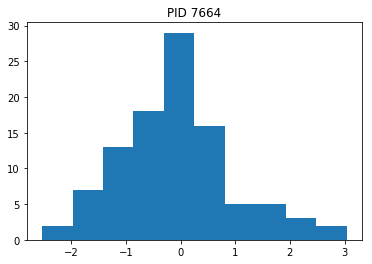

[output:1]

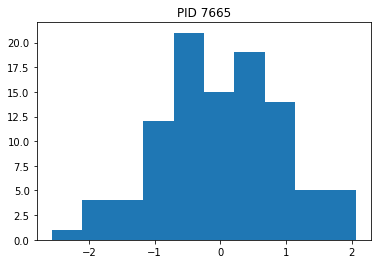

[output:2]

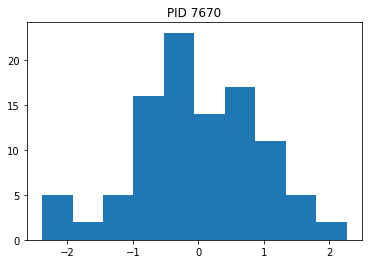

[output:3]

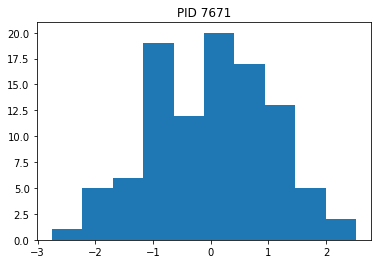

In [52]:
%%px 
%matplotlib inline
import matplotlib.pyplot as plt
import os
tsamples = numpy.random.randn(100)
plt.hist(tsamples)
_ = plt.title('PID %i' % os.getpid())

## Jupyter cloud services

There are a growing number of services for hosting and running notebooks remotely.

### mybinder.org 

Have a repository full of Jupyter notebooks? With Binder, you can add a badge that opens those notebooks in an executable environment, making your code immediately reproducible by anyone, anywhere.

[My PyCon 2017 tutorial in mybinder](https://beta.mybinder.org/v2/gh/fonnesbeck/intro_stat_modeling_2017/master)

If you followed the instructions above, you launched the Jupyter Notebook App on a cloud service called **`tmpnb`**. As the prefix `tmp` indicates, it gives you a temporary demo: as soon as you close the browser tab (or after a few minutes of inactivity), the kernel dies and the content you wrote is not saved anywhere. This is a free service, sponsored by the company Rackspace, j 

### Azure

In June 2016, Microsoft announced [notebooks hosted on Azure](https://notebooks.azure.com) cloud. You need to create a free account to be able to save your work.

### Domino Data Lab

Though you can set up your own Amazon EC2 instances and run notebooks, [Domino Data lab](https://www.dominodatalab.com/) does most of the work in setting up and provisioning Amazon services with Jupyter notebooks (and other cloud software) ready to launch. You can choose the compute size, and pay on a sliding scale.

In addition to this, you can host your own temporary notebooks using [tmpnb](https://github.com/jupyter/tmpnb), which uses Docker images to run notebooks on-demand, that automatically shut down when they are idle.


---

## Links and References

* [IPython Notebook Viewer](http://nbviewer.ipython.org) Displays static HTML versions of notebooks, and includes a gallery of notebook examples.

* [A Reference-Free Algorithm for Computational Normalization of Shotgun Sequencing Data](http://ged.msu.edu/papers/2012-diginorm/) A landmark example of reproducible research in genomics: Git repo, iPython notebook, data and scripts.

* Jacques Ravel and K Eric Wommack. 2014. [All Hail Reproducibility in Microbiome Research](http://www.microbiomejournal.com/content/pdf/2049-2618-2-8.pdf). Microbiome, 2:8.

* Benjamin Ragan-Kelley et al.. 2013. [Collaborative cloud-enabled tools allow rapid, reproducible biological insights](http://www.nature.com/ismej/journal/v7/n3/full/ismej2012123a.html). The ISME Journal, 7, 461–464; doi:10.1038/ismej.2012.123;